In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rungekutta import RK4_test_solver, adaptive_RK34
from lotkavolterra import LotkaVolterra


# Task 1.1

Showcase that the error in the RK4 method is $\mathcal{O}(h^4)$, where $h$ is the step size.

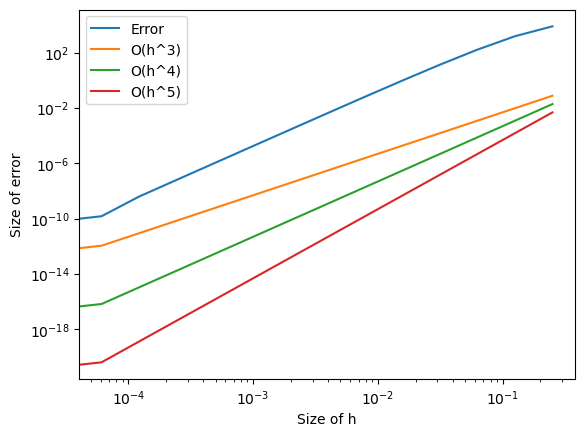

In [3]:
err  = np.zeros([14])
stepsize = np.zeros([14])
t0 = 0
tf = 1
u0 = np.array([1])

test_func = lambda _, y: 10 * y
true_solution = lambda t: np.exp(10 * t) * u0

for i in range(2,15):
    N = 2**i
    h = (tf - t0) / N
    stepsize[i - 2] = h
    _, _, newerr = RK4_test_solver(test_func, true_solution, u0, t0, tf, N)
    err[i - 2] = np.abs(newerr[:, N])
plt.loglog(stepsize, err)
plt.loglog(stepsize, 5*stepsize**3)
plt.loglog(stepsize, 5*stepsize**4)
plt.loglog(stepsize, 5*stepsize**5)
plt.legend(['Error', 'O(h^3)', 'O(h^4)', 'O(h^5)'])
plt.xlabel('Size of h')
plt.ylabel('Size of error')
plt.show()

# Task 1.4
Solving the equation $y'=f(t, y)$ using an adaptive RK34 solver. Here the test equation $f(t, y)=10y$ is used.

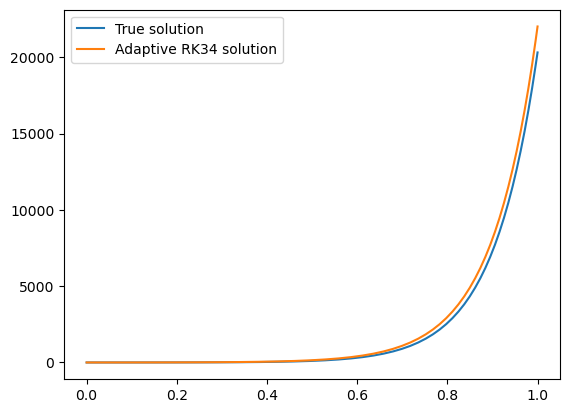

In [4]:
f = lambda _, u: 10 * u
t0 = 0
tf = 1
y0 = np.array([1,2,3])
tol = 0.1
t, y = adaptive_RK34(f,t0, tf, y0, tol)


plt.plot(t, y[0,:])
plt.plot(t, np.exp(10*t)*y0[0])
plt.legend(['True solution', 'Adaptive RK34 solution'])
plt.show()

# Task 2.1

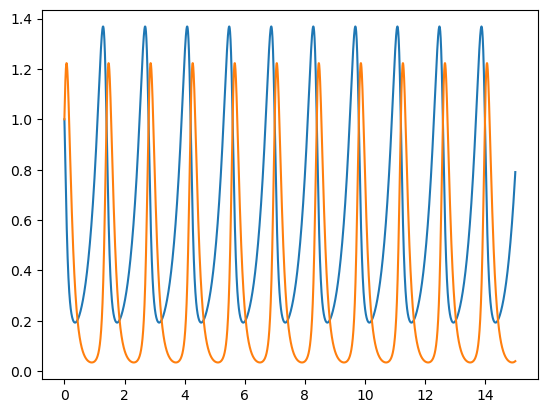

In [10]:
de = LotkaVolterra(3, 9, 15, 15, 1, 1)
u0 = de.u0
t0 = 0
tf = 15
tol = 10**(-9)
f = de.get_f()

t_grid, u = adaptive_RK34(f, t0, tf, u0, tol)

plt.plot(t_grid, u[0,:])
plt.plot(t_grid, u[1,:])
plt.show()

